<a href="https://colab.research.google.com/github/mustafabozkaya/hands-on-transfer-learning-with-python/blob/master/Datasets_Builder_with_CNN_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://medium.com/unpackai/how-to-use-kaggle-datasets-in-google-colab-f9b2e4b5767c

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install kaggle

In [2]:
%ls

drive/  sample_data/


In [3]:
%cd drive/MyDrive/kaggledatasets/

/content/drive/MyDrive/kaggledatasets


In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/kaggledatasets/"

In [ ]:
#@title Download kaggle dataset after rules aggred
!kaggle competitions download -c dogs-vs-cats

In [6]:
DATA_DIR = './githupfolder/'

# load repo with data if it is not exists
if not os.path.exists(DATA_DIR):
    print('Loading data...')
    os.system('git clone https://github.com/dipanjanS/hands-on-transfer-learning-with-python ./githupfolder')
    print('Done!')

Loading data...
Done!


In [10]:
!unzip "/content/drive/MyDrive/kaggledatasets/train.zip" -d "/content/githupfolder/notebooks/datasets"

Streaming output truncated to the last 5000 lines.
  inflating: /content/githupfolder/notebooks/datasets/train/dog.5499.jpg  
  inflating: /content/githupfolder/notebooks/datasets/train/dog.55.jpg  
  inflating: /content/githupfolder/notebooks/datasets/train/dog.550.jpg  
  inflating: /content/githupfolder/notebooks/datasets/train/dog.5500.jpg  
  inflating: /content/githupfolder/notebooks/datasets/train/dog.5501.jpg  
  inflating: /content/githupfolder/notebooks/datasets/train/dog.5502.jpg  
  inflating: /content/githupfolder/notebooks/datasets/train/dog.5503.jpg  
  inflating: /content/githupfolder/notebooks/datasets/train/dog.5504.jpg  
  inflating: /content/githupfolder/notebooks/datasets/train/dog.5505.jpg  
  inflating: /content/githupfolder/notebooks/datasets/train/dog.5506.jpg  
  inflating: /content/githupfolder/notebooks/datasets/train/dog.5507.jpg  
  inflating: /content/githupfolder/notebooks/datasets/train/dog.5508.jpg  
  inflating: /content/githupfolder/notebooks/dataset

In [13]:
%cd /

/


In [14]:
%cd content/githupfolder/notebooks/Ch05\ -\ Unleash\ the\ Power\ of\ Transfer\ Learning

/content/githupfolder/notebooks/Ch05 - Unleash the Power of Transfer Learning


In [82]:
import glob
import numpy as np
import os
import shutil
from utils import log_progress
import cv2 as cv
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(18,8)
%matplotlib inline
np.random.seed(42)

In [16]:
%pwd

'/content/githupfolder/notebooks/Ch05 - Unleash the Power of Transfer Learning'

In [17]:
files = np.array(glob.glob('../datasets/train/*'))
files.shape

(25000,)

In [18]:
files[:5]

array(['../datasets/train/dog.2665.jpg', '../datasets/train/dog.7654.jpg',
       '../datasets/train/cat.344.jpg', '../datasets/train/cat.7976.jpg',
       '../datasets/train/dog.9125.jpg'], dtype='<U31')

In [19]:
cat_files = [fn for fn in files if 'cat' in fn]
dog_files = [fn for fn in files if 'dog' in fn]
len(cat_files), len(dog_files)

(12500, 12500)

In [20]:
img_=dog_files[1000]

In [21]:
#cv.imshow("cat image",cat_files[21])
img=cv.imread(img_)
img=cv.cvtColor(img,cv.COLOR_BGR2RGB)



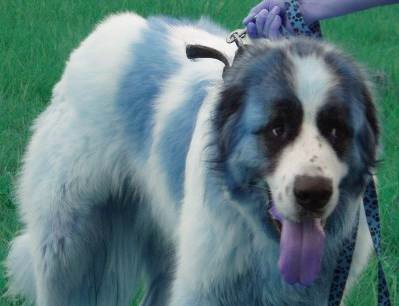

In [22]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [23]:
cat_train = np.random.choice(cat_files, size=1500, replace=False)
dog_train = np.random.choice(dog_files, size=1500, replace=False)
cat_files = list(set(cat_files) - set(cat_train))
dog_files = list(set(dog_files) - set(dog_train))

cat_val = np.random.choice(cat_files, size=500, replace=False)
dog_val = np.random.choice(dog_files, size=500, replace=False)
cat_files = list(set(cat_files) - set(cat_val))
dog_files = list(set(dog_files) - set(dog_val))

cat_test = np.random.choice(cat_files, size=500, replace=False)
dog_test = np.random.choice(dog_files, size=500, replace=False)

print('Cat datasets:', cat_train.shape, cat_val.shape, cat_test.shape)
print('Dog datasets:', dog_train.shape, dog_val.shape, dog_test.shape)

Cat datasets: (1500,) (500,) (500,)
Dog datasets: (1500,) (500,) (500,)


In [24]:
cat_train[:2],dog_train[:2]

(array(['../datasets/train/cat.9782.jpg', '../datasets/train/cat.4973.jpg'],
       dtype='<U31'), array(['../datasets/train/dog.10221.jpg',
        '../datasets/train/dog.9127.jpg'], dtype='<U31'))

In [25]:

train_files = np.concatenate([cat_train, dog_train])
validate_files = np.concatenate([cat_val, dog_val])
test_files = np.concatenate([cat_test, dog_test])


In [26]:
print('train datasets:', train_files.shape, validate_files.shape, test_files.shape)

train datasets: (3000,) (1000,) (1000,)


In [27]:
data_dir="/content/githupfolder/notebooks/datasets/dog_cat"
if not os.path.exists(data_dir):
  os.mkdir(data_dir)

train_dir = "train_data"
val_dir = "validation_data"
test_dir = "test_data"


In [28]:
os.chdir("/content/githupfolder/notebooks/Ch05 - Unleash the Power of Transfer Learning/")


In [29]:
os.mkdir(os.path.join(data_dir,train_dir)) if not os.path.exists(os.path.join(data_dir,train_dir)) else None
os.mkdir(os.path.join(data_dir,val_dir)) if not os.path.exists(os.path.join(data_dir,val_dir)) else None
os.mkdir(os.path.join(data_dir,test_dir)) if not os.path.exists(os.path.join(data_dir,test_dir)) else None

for fn in log_progress(train_files, name='Training Images'):
    shutil.copy(fn, os.path.join(data_dir,train_dir))

for fn in log_progress(validate_files, name='Validation Images'):
    shutil.copy(fn, os.path.join(data_dir,val_dir) )
    
for fn in log_progress(test_files, name='Test Images'):
    shutil.copy(fn, os.path.join(data_dir,test_dir) )

In [30]:
%ls

'Basic CNN Model.ipynb'               model_evaluation_utils.py
'CNN with Image Augmentation.ipynb'  'Model Performance Evaluations.ipynb'
'CNN with Transfer Learning.ipynb'    __pycache__/
'Datasets Builder.ipynb'              utils.py


In [31]:
import pandas as pd
train_=pd.DataFrame([image_f for image_f in os.listdir(os.path.join(data_dir,train_dir))],columns=["img_file"])


In [32]:
train_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   img_file  3000 non-null   object
dtypes: object(1)
memory usage: 23.6+ KB


# Build CNN model 

In [38]:
import tensorflow as tf

from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img


In [57]:
IMG_DIM = (150, 150)

train_files = glob.glob(str(os.path.join(data_dir,train_dir))+'/*')
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)
train_labels = [fn.split('/')[7].split(".")[0].strip() for fn in train_files]

validation_files =  glob.glob(str(os.path.join(data_dir,val_dir))+'/*')
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs = np.array(validation_imgs)
validation_labels = [fn.split('/')[7].split(".")[0].strip() for fn in validation_files]

print('Train dataset shape:', train_imgs.shape,
      '\tValidation dataset shape:', validation_imgs.shape)

Train dataset shape: (3000, 150, 150, 3) 	Validation dataset shape: (1000, 150, 150, 3)


In [40]:
(str(os.path.join(data_dir,train_dir))+'/*')

'/content/githupfolder/notebooks/datasets/dog_cat/train_data/*'

In [56]:
train_files[3].split('/')[7].split(".")[0].strip()

'cat'

## İmage proprocessing , scalling and plotting

In [ ]:
train_imgs_scaled = train_imgs.astype('float32')
validation_imgs_scaled  = validation_imgs.astype('float32')
train_imgs_scaled /= 255
validation_imgs_scaled /= 255
train_imgs

(150, 150, 3)


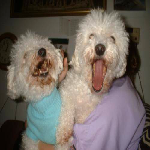

In [64]:
print(train_imgs[0].shape)
array_to_img(train_imgs[0])

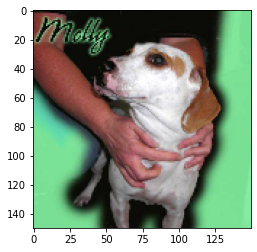

In [108]:
plt.imshow(train_imgs_scaled[1])

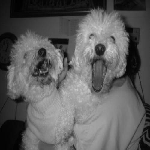

In [80]:
# convert the image to grayscale and create a histogram
cv_img=train_imgs[0]
cv_img = cv.cvtColor(cv_img, cv.COLOR_BGR2GRAY)
cv2_imshow(cv_img)


(0.0, 256.0)

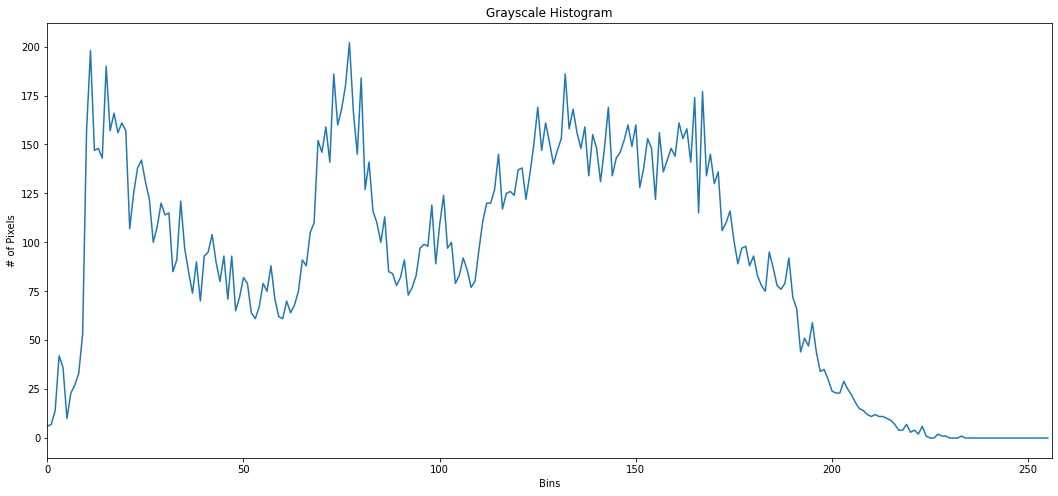

In [104]:
hist = cv.calcHist([cv_img], [0], None, [256], [0, 256])
plt.figure(figsize=(18,8))
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])

## Computing a Flattened Color Histogram using Python and OpenCV

flattened feature vector size: %(768,) 


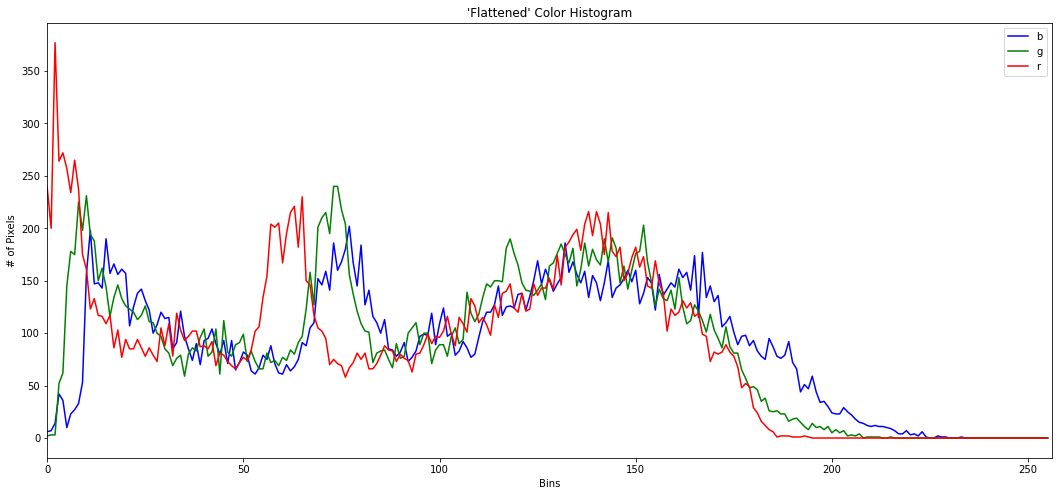

In [105]:

# grab the image channels, initialize the tuple of colors,
# the figure and the flattened feature vector
cv_img=train_imgs[0]
chans = cv.split(cv_img)
colors = ("b", "g", "r")
plt.figure(figsize=(18,8))
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
features = []
# loop over the image channels
for (chan, color) in zip(chans, colors):
	# create a histogram for the current channel and
	# concatenate the resulting histograms for each
	# channel
	hist = cv.calcHist([chan], [0], None, [256], [0, 256])
	features.extend(hist)
	# plot the histogram
	plt.plot(hist, color = color)
	plt.xlim([0, 256])
 
plt.legend(colors)
# here we are simply showing the dimensionality of the
# flattened color histogram 256 bins for each channel
# x 3 channels = 768 total values -- in practice, we would
# normally not use 256 bins for each channel, a choice
# between 32-96 bins are normally used, but this tends
# to be application dependent
print ("flattened feature vector size: %{0} ".format(np.array(features).flatten().shape))

In [106]:
batch_size = 30
num_classes = 2
epochs = 30
input_shape = (150, 150, 3)

# encode text category labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_labels)
train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)

print(train_labels[1495:1505], train_labels_enc[1495:1505])

['cat', 'cat', 'cat', 'dog', 'dog', 'dog', 'cat', 'dog', 'cat', 'dog'] [0 0 0 1 1 1 0 1 0 1]


In [107]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers

model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        9280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

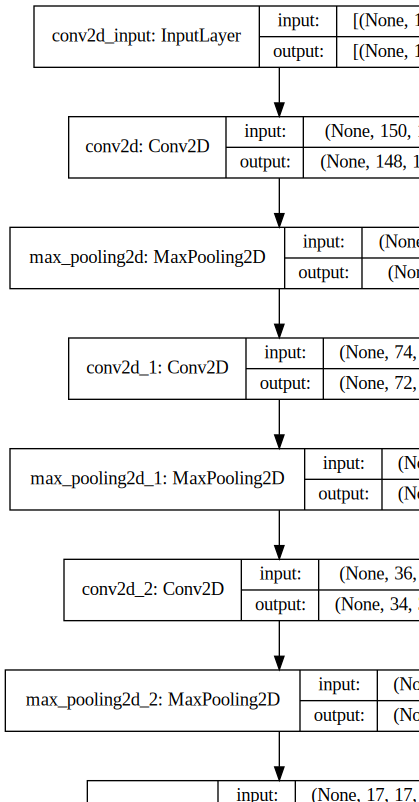

In [109]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True, 
                 show_layer_names=True, rankdir='TB').create(prog='dot', format='svg'))